<a href="https://colab.research.google.com/github/grosetta/rdkit_study/blob/main/%E5%88%86%E5%AD%90%E8%81%9A%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#文件头代码
import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0,"/content/gdrive/My Drive/Colab Notebooks/python_package/")

Mounted at /content/gdrive


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina
 
    # first generate the distance matrix:
    dists = []   #距离列表
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])
 
    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

共有聚类数： 187
聚类0的分子序号有： (120, 118, 119, 121)


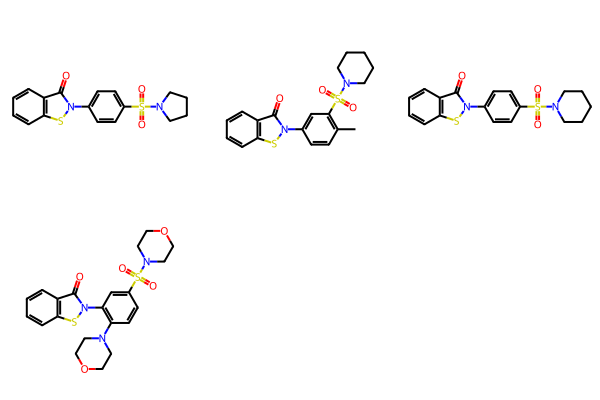

In [22]:
#generate fingerprints
ms = [x for x in Chem.ForwardSDMolSupplier('/content/gdrive/MyDrive/data/molecules.sdf') if x is not None]
fps = [AllChem.GetMorganFingerprintAsBitVect(x,2,1024) for x in ms]
 
#cluster
clusters=ClusterFps(fps,cutoff=0.5)
 
# show one of the clusters
print('共有聚类数：',len(clusters))
print('聚类0的分子序号有：',clusters[0])
 
#now display structures from one of the clusters
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
 
#look at a specific cluster
m1 = ms[120]
m2 = ms[118]
m3 = ms[119]
m4 = ms[121]
mols=(m1,m2,m3,m4)
Draw.MolsToGridImage(mols)